In [444]:
# Problem Statement 1:
# There is an automobile company Cars24X7 from India  which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
# They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market.  Essentially, the company wants to know:
# Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered  a large dataset of different types of cars across the American market.
# Business Objectives:
# You as a Data scientist are required to apply some data science techniques  for the price of cars with the available independent variables.  That should help the management to understand how exactly the prices vary with the independent variables. 
#  They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
#  Also build the Random Forest Regressor for optimal search of classifiers.
# Dataset: data1.csv
# Note : kindly build the project with following pointers
# 		1.Data understanding and exploration
# 		2.Data cleaning
# 		3.Data preparation
# 		4.Model building and evaluation
# 		5.Result with error calculation


In [534]:
#importing all required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [535]:
#reading file
df1=pd.read_csv("car.csv")
df1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [536]:
#checking shape of dataset
df1.shape

(301, 9)

In [537]:
#checking datatype and non-null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [538]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [539]:
df1.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [540]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [541]:
df1.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [542]:
#checking for null values
df1.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

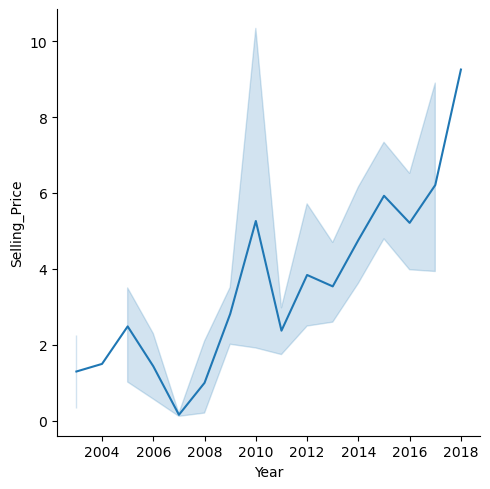

In [454]:
#ploting selling price over year

fig=plt.figure(figsize=(10,10))
sns.relplot("Year","Selling_Price",data=df1,kind='line')

In [455]:
#to know selling price price highest and lowest price and mean 

In [543]:
df1["Selling_Price"].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


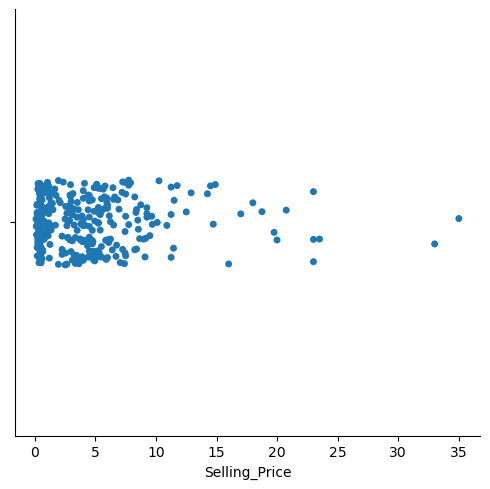

In [457]:
sns.catplot("Selling_Price",data=df1)

In [458]:
# ploting relation between selling and present price

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

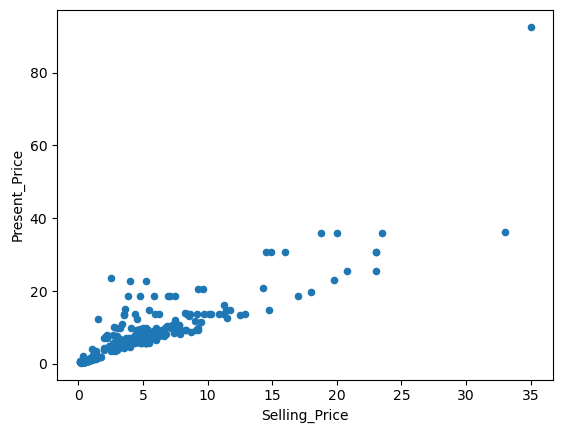

In [544]:
df1.plot.scatter(x="Selling_Price",y="Present_Price")

In [460]:
#for every year petrol cars and bike are morefor selling then desel and CNG

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

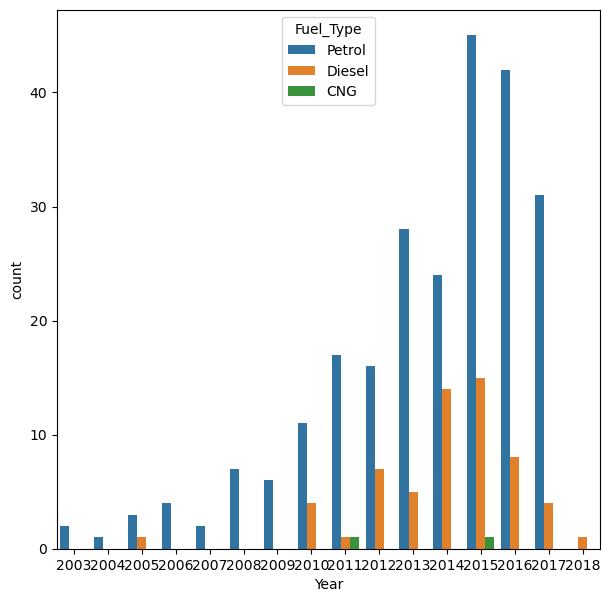

In [545]:
#ploting year over Fule_type

fig=plt.figure(figsize=(7,7))
sns.countplot("Year",hue="Fuel_Type",data=df1)

In [462]:
#plot for who has more price in transmission type manual and automatic

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 500x500 with 0 Axes>

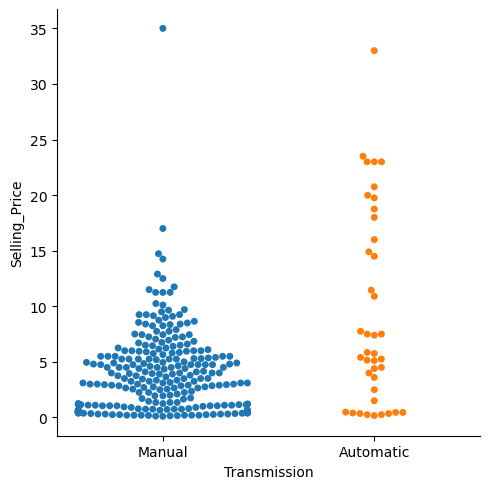

In [546]:
#ploting Transmission over Selling_Price

plt.figure(figsize=(5,5))
sns.catplot(kind="swarm",x='Transmission',y='Selling_Price',data=df1,split=True)

In [464]:
#check for keilometer dirven affect the selling price

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

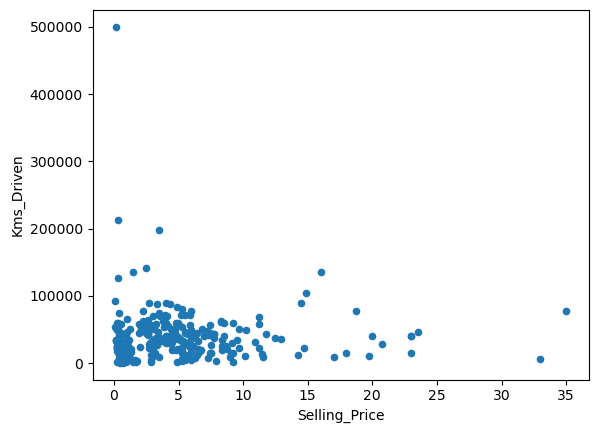

In [547]:
# ploting relation between selling and Kms_Driven
df1.plot.scatter(x="Selling_Price",y="Kms_Driven")

<AxesSubplot:xlabel='Year', ylabel='Fuel_Type'>

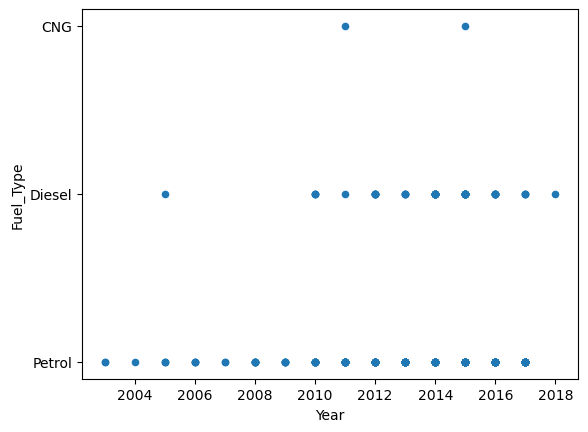

In [466]:
#ploting year over Fule_type

df1.plot.scatter(x="Year",y="Fuel_Type")

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

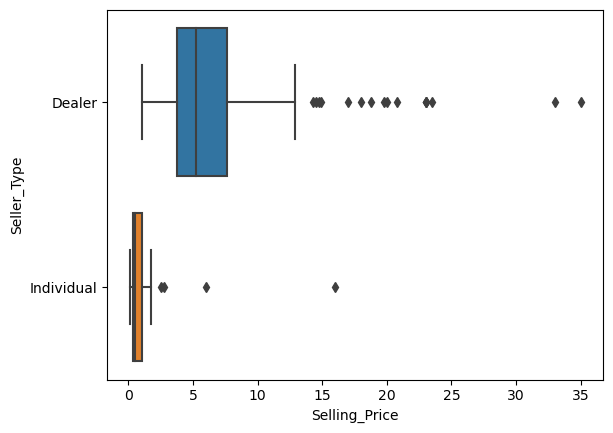

In [548]:
#ploting boxplot selling price and seller_type for checking outliers
sns.boxplot(x="Selling_Price",y="Seller_Type",data=df1)

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

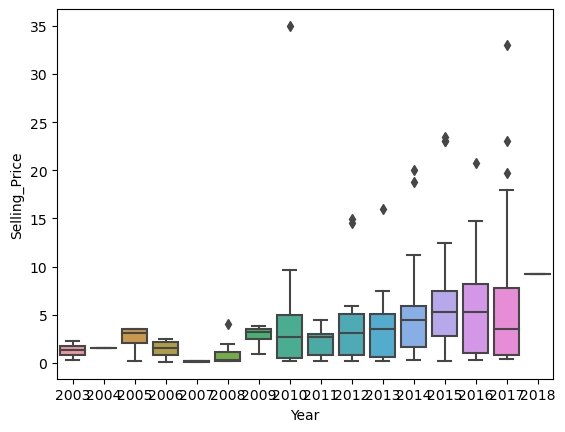

In [549]:
#ploting boxplot Year and Selling_Price for checking outliers
sns.boxplot(x="Year",y="Selling_Price",data=df1)

In [550]:
#droping car_name column 
df1.drop(['Car_Name'],axis=1,inplace=True)

In [551]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [471]:
# make colunm Prescent_Year which all elements values as 2023.
# on substracing  Present_year and year colunm we can make another 
# freature variable as numbor_o_years_old to know how old car is


In [552]:
df1['Present_year']=2023
df1['Number_of_year_old']=df1["Present_year"]-df1['Year']
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_year,Number_of_year_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [553]:
df1.drop(labels=['Year','Present_year'],axis=1,inplace=True)

In [554]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_year_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [555]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_year_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [476]:
# Encoding categorical data

In [556]:
df1=pd.get_dummies(df1,drop_first=True)
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [557]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Number_of_year_old      301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


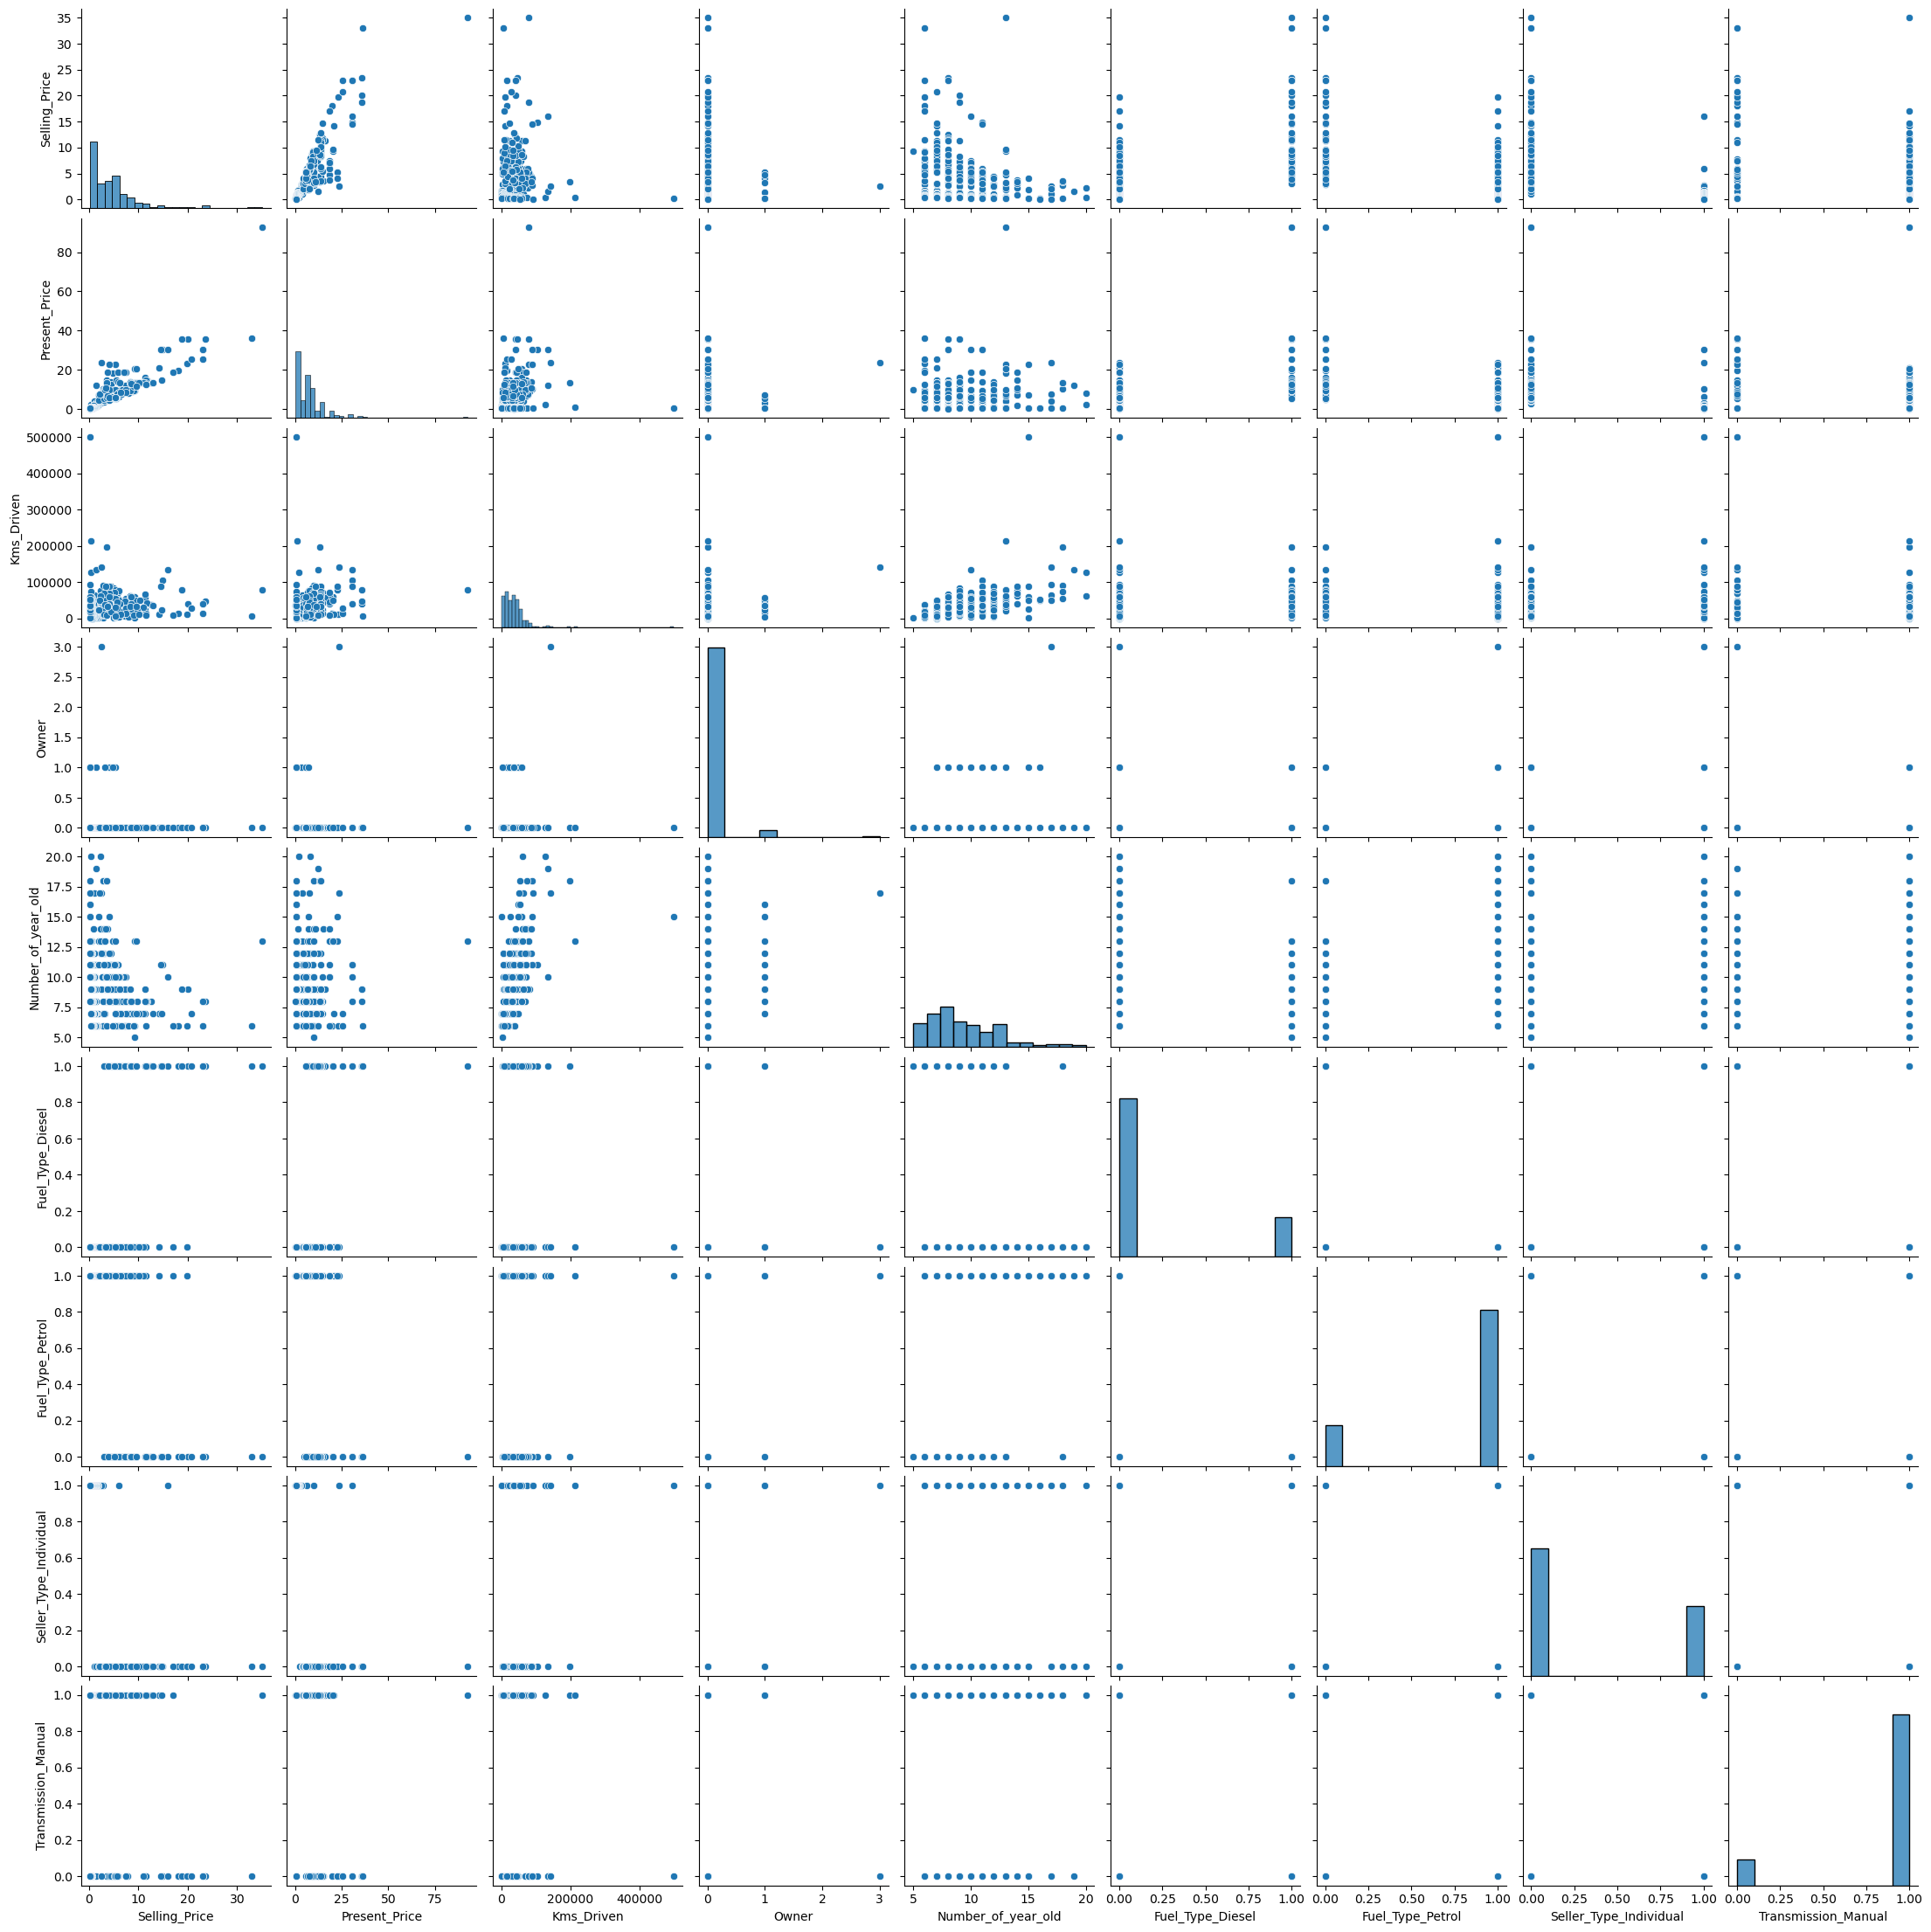

In [558]:
#ploting pair plot for all columns
sns.pairplot(data=df1)

In [481]:
#ploting corelation between columns by using heatmap 

<AxesSubplot:>

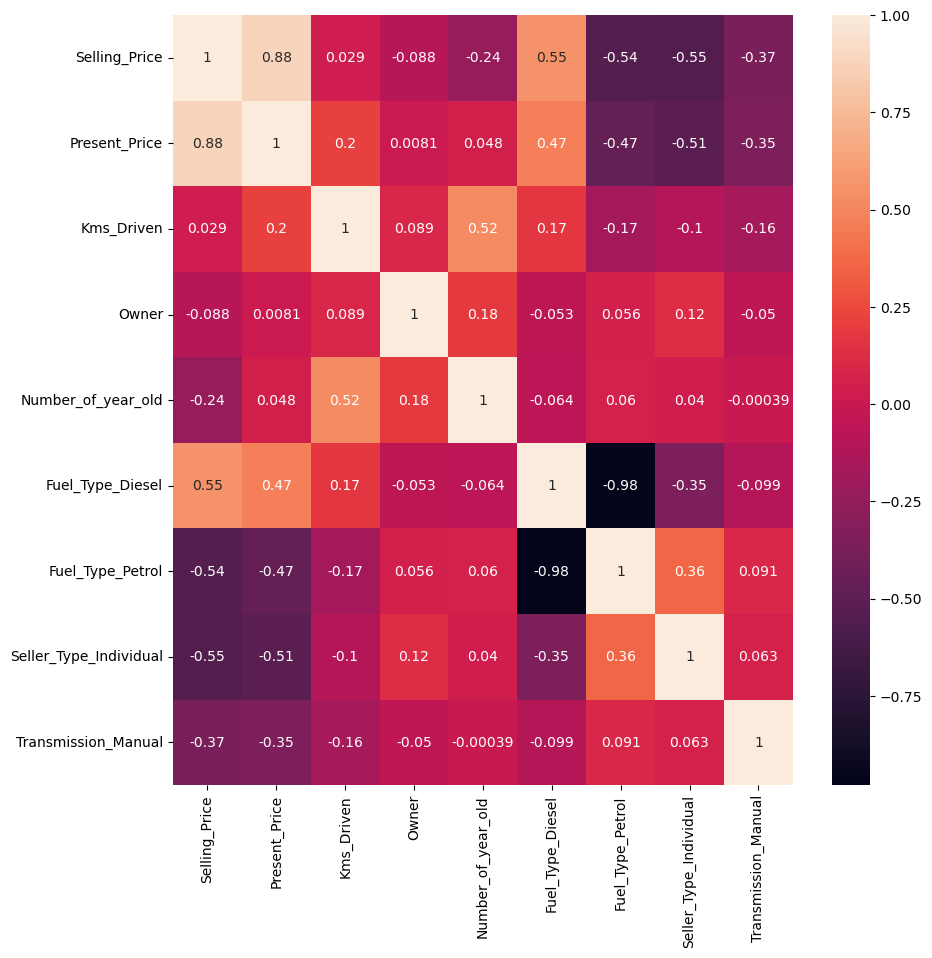

In [482]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)


In [483]:
#from heatmap we concluded that 
#present_price to selling_price having 0.88 corelation


In [486]:
#taking dependent and independent column

In [560]:
X=df1.drop('Selling_Price',axis=1)
y=df1['Selling_Price']

In [561]:
X

,Present_Price,Kms_Driven,Owner,Number_of_year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,7,1,0,0,1
297,5.90,60000,0,8,0,1,0,1
298,11.00,87934,0,14,0,1,0,1
299,12.50,9000,0,6,1,0,0,1


In [562]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [564]:
print(x.shape)

(100, 1)


In [565]:
print(y.shape)

(301,)


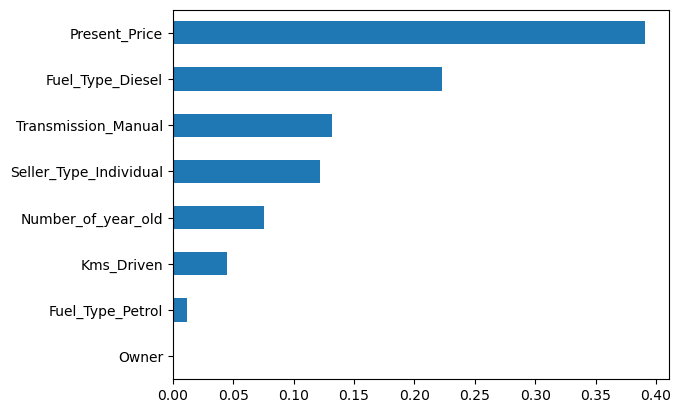

In [566]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
feat_imp=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh')
plt.show()



In [491]:
# Standard Scaling


In [567]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [568]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [494]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [240, 61]

In [496]:
df2=pd.read_excel("data_final.xlsx")

In [497]:
df2.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [498]:
df2.tail()

,observation,feature,price
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53
99,0.77,0.36,593.86


In [499]:
df2.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [500]:
df2.describe(include='all')

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [502]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [503]:
df2.isna().sum()

observation    0
feature        0
price          0
dtype: int64

In [504]:
df2.shape

(100, 3)

In [512]:
df2.nunique()

observation     65
feature         61
price          100
dtype: int64

In [507]:
df2['observation'].describe()

count    100.000000
mean       0.550300
std        0.293841
min        0.010000
25%        0.300000
50%        0.570000
75%        0.822500
max        1.000000
Name: observation, dtype: float64

In [508]:
df2['feature'].describe()

count    100.000000
mean       0.501700
std        0.307124
min        0.000000
25%        0.230000
50%        0.485000
75%        0.760000
max        0.990000
Name: feature, dtype: float64

In [509]:
df2['price'].describe()

count     100.000000
mean      554.214600
std       347.312796
min        42.080000
25%       278.172500
50%       514.285000
75%       751.752500
max      1563.820000
Name: price, dtype: float64

<Figure size 1000x1000 with 0 Axes>

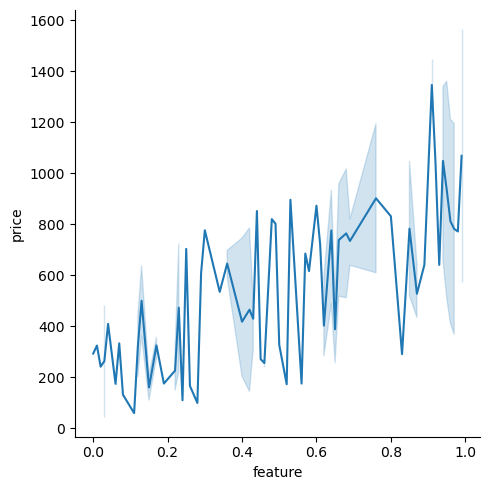

In [506]:
#ploting feature over price

fig=plt.figure(figsize=(10,10))
sns.relplot("feature","price",data=df2,kind='line')

In [514]:
#independent variable
x=df2.iloc[:,1:-1].values
#dependent variable
y=df2.iloc[:,-1].values
x=x.reshape(-1,1)

In [515]:
x

array([[0.68],
       [0.23],
       [0.29],
       [0.45],
       [0.83],
       [0.8 ],
       [0.92],
       [0.43],
       [0.89],
       [0.95],
       [0.06],
       [0.91],
       [0.69],
       [0.94],
       [0.06],
       [0.17],
       [0.66],
       [0.43],
       [0.64],
       [0.44],
       [0.93],
       [0.43],
       [0.85],
       [0.07],
       [0.52],
       [0.15],
       [0.13],
       [0.6 ],
       [0.4 ],
       [0.65],
       [0.17],
       [0.97],
       [0.04],
       [0.53],
       [0.85],
       [0.69],
       [0.22],
       [0.15],
       [0.02],
       [0.91],
       [0.76],
       [0.19],
       [0.62],
       [0.17],
       [0.69],
       [0.76],
       [0.23],
       [0.96],
       [0.03],
       [0.23],
       [0.11],
       [0.87],
       [0.97],
       [0.25],
       [0.58],
       [0.42],
       [0.24],
       [0.62],
       [0.15],
       [0.95],
       [0.64],
       [0.64],
       [0.4 ],
       [0.12],
       [0.22],
       [0.4 ],
       [0.

In [516]:
y

array([ 511.14,  717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,
        455.19,  640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,
        169.88,  276.05,  517.43,  522.25,  932.21,  851.25,  640.11,
        308.68, 1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,
        303.7 ,  256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,
        638.75,  301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,
        593.45,  355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,
        166.19,   58.62,  642.45,  368.14,  702.78,  615.74,  143.79,
        109.  ,  328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,
        202.01,  148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,
         98.47,  819.63,  174.44,  483.13,  534.24,  572.31,  957.61,
        518.29, 1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,
        292.23,  775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,
        771.11, 1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,
        434.53,  593

In [517]:
#spliting the dataset:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [520]:
#linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
plo_reg=PolynomialFeatures(degree=4)
x_plo=plo_reg.fit_transform(x)

In [521]:
x_plo

array([[1.0000000e+00, 6.8000000e-01, 4.6240000e-01, 3.1443200e-01,
        2.1381376e-01],
       [1.0000000e+00, 2.3000000e-01, 5.2900000e-02, 1.2167000e-02,
        2.7984100e-03],
       [1.0000000e+00, 2.9000000e-01, 8.4100000e-02, 2.4389000e-02,
        7.0728100e-03],
       [1.0000000e+00, 4.5000000e-01, 2.0250000e-01, 9.1125000e-02,
        4.1006250e-02],
       [1.0000000e+00, 8.3000000e-01, 6.8890000e-01, 5.7178700e-01,
        4.7458321e-01],
       [1.0000000e+00, 8.0000000e-01, 6.4000000e-01, 5.1200000e-01,
        4.0960000e-01],
       [1.0000000e+00, 9.2000000e-01, 8.4640000e-01, 7.7868800e-01,
        7.1639296e-01],
       [1.0000000e+00, 4.3000000e-01, 1.8490000e-01, 7.9507000e-02,
        3.4188010e-02],
       [1.0000000e+00, 8.9000000e-01, 7.9210000e-01, 7.0496900e-01,
        6.2742241e-01],
       [1.0000000e+00, 9.5000000e-01, 9.0250000e-01, 8.5737500e-01,
        8.1450625e-01],
       [1.0000000e+00, 6.0000000e-02, 3.6000000e-03, 2.1600000e-04,
        1.29

In [523]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [525]:
reg2=LinearRegression()
reg2.fit(x_plo,y)

LinearRegression()

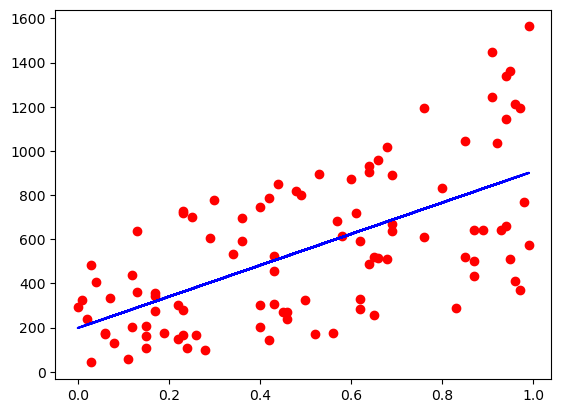

In [528]:
plt.scatter(x,y,color="red")
plt.plot(x,reg.predict(x),color='blue')

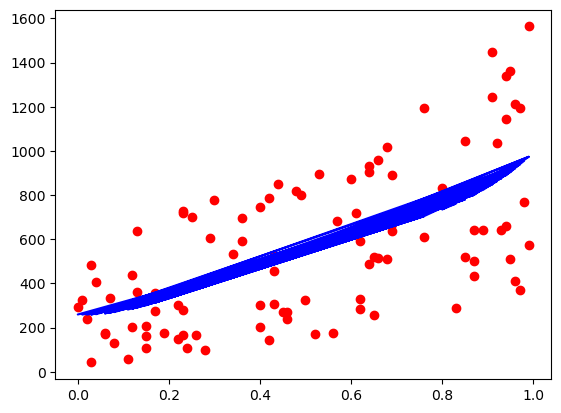

In [530]:
plt.scatter(x,y,color="red")
plt.plot(x,reg2.predict(plo_reg.fit_transform(x)),color='blue')